In [3]:
%pip install scikit-learn

     ---------------------------------------- 11.0/11.0 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 KB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
# Load modules
import cfd_simulate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import three_desc_model as exponential_new
from itertools import combinations
from cutoffs import Polynomial
import GP_functions1 as GP
from GP_functions1 import TurbineUtility
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [5]:
# Constants
min_dist = 279.0
max_xdist = 4000
max_width = 500
numturb = 4

In [6]:
#Set up neighbourlist calculation
# USE NEW CLASSES
turbine_utility = TurbineUtility()
nl = turbine_utility.nl
nl=exponential_new.NeighborlistCalculator(cutoff=4001,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
symbol="Siemens"
turb = [symbol]

In [10]:
while True:
    # Generate random coordinates
    turbines = np.zeros([numturb,2])
    for i in range(1,numturb):
        # X coordinate from triangular distribution (mode 0)
        turbines[i,0]=np.random.triangular(0,0,max_xdist)
        # y coordinate from triangular distribution (mode 0)
        turbines[i,1]=np.random.triangular(-max_width,0,max_width)
    print(turbines)
    neigh=nl.calculate(turb*numturb,turbines) # And here
    print(neigh)
    # Check neighbours
    for i in range(numturb):
        if (len(neigh[i])==numturb-1):
            # if one of them has maximal number of neigbours: break loop
            break
    else:
        # If none of them has maximal number of neighbours: Try again
        print("Not enough neighbours")
        continue
    # Check distances
    for i, j in combinations(range(numturb), 2):
        if (np.linalg.norm(turbines[i]-turbines[j])<min_dist):
            # Two turbines are too close
            print("Distance between turbine ",i+1," and turbine ",j+1," is too low.")
            break
    else:
        # None of the turbines are too close: SUCCESS!
        break
    continue


[[   0.            0.        ]
 [1463.12262219 -160.79511941]
 [1856.11510783  -70.97731181]
 [ 683.81398342  135.18880293]]
[[], [0], [0, 1, 3], [0]]


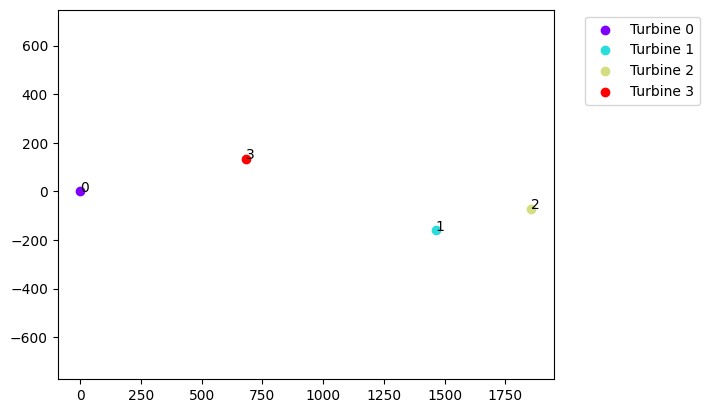

In [11]:
# turbines = np.array(...)
numturb = turbines.shape[0]

# Rainbow colormap with as many colors as turbines
cmap = plt.get_cmap('rainbow', numturb)

# Plot turbines
for i in range(numturb):
    plt.scatter(turbines[i,0], turbines[i,1], color=cmap(i), label='Turbine ' + str(i))

# Set the desired limits for the x and yaxes
plt.xlim(-300, 4500)
plt.ylim(-500, 500)
plt.axis('equal')

# Add labels to each point
for i in range(numturb):
    plt.text(turbines[i, 0], turbines[i, 1], str(i))

# Add legends
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()




In [12]:
turbine_coords = np.array(turbines)
sim_number = 2
cfd_simulate.simulate(turbine_coords, sim_number)

1


0